## Build a tree from IMG's taxonomy

This notebook reads `/global/projectb/sandbox/IMG_web/img_web_data/all_public.txt` 
and constructs a NEWICK file using `taxon_oid` for the leaf names. This is certainly 
not the ideal way to construct a phylogeny, but it will serve for method development.

In [1]:
# adapted from https://stackoverflow.com/questions/26146623/convert-csv-to-newick-tree

import pyprind
import pandas
from collections import defaultdict


def tree(): return defaultdict( tree )

def tree_add( t, path ) :
    
    for node in path :
        t = t[ '\'' + str( node ).strip() + '\'' ]
        #t = t[ str(node).strip() ]
        
def csv_to_tree( data ) :
    
    t = tree()
    progbar = pyprind.ProgBar( data.shape[0], title='building tree...', monitor=True )
    
    for n,row in data.iterrows() :
        progbar.update()
        tree_add( t, row )
    
    return t

def tree_to_newick( root ) :
    
    items = []
    
    for k in root.keys():
        s = ''
        if len( root[k].keys() ) > 0 :
            sub_tree = tree_to_newick( root[k] )
            if sub_tree != '' :
                s += '(' + sub_tree + ')'
        s += k
        items.append(s)
        
    return ','.join( items )

data = pandas.read_csv( 'data/all_public.txt', sep='\t', header=0 )

t = csv_to_tree( data[ [ 'domain', 'phylum', 'ir_class', 'ir_order', 'family', 'genus', 'taxon_oid' ] ] )
    
newick = tree_to_newick( t ) + ';'


building tree...
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


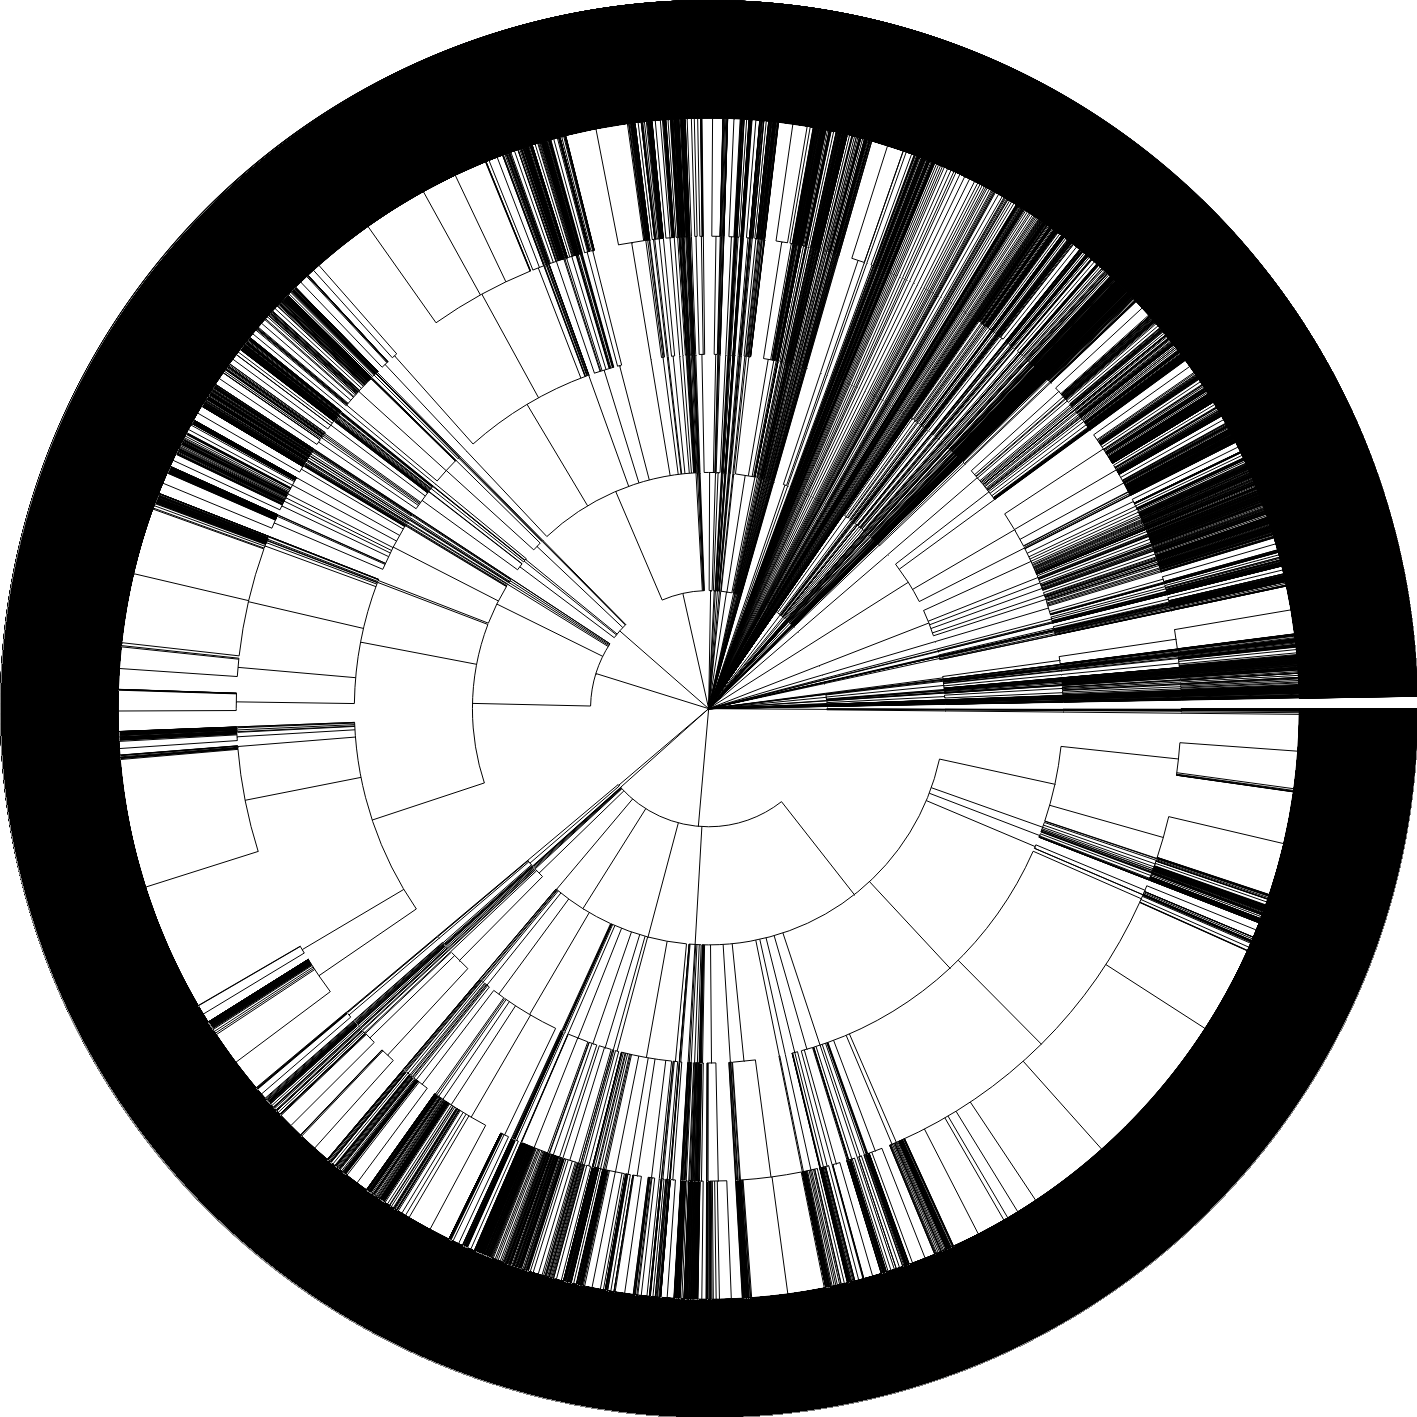

In [2]:
from ete3 import Tree, TreeStyle, NodeStyle, TextFace
from numpy import linspace

T = Tree( newick, format=8, quoted_node_names=True )

ts = TreeStyle()
ts.mode = 'r'
#ts.mode = 'c'
ts.show_leaf_name = False
ts.branch_vertical_margin = 1
ts.scale = 1000


nstyle = NodeStyle()
nstyle['size'] = 0
nstyle["vt_line_width"] = 1
nstyle["hz_line_width"] = 1
nstyle["vt_line_type"] = 0 # 0 solid, 1 dashed, 2 dotted
nstyle["hz_line_type"] = 0

ts = TreeStyle()
ts.mode = 'c'
ts.show_leaf_name = False
ts.show_scale = False
ts.branch_vertical_margin = 30
ts.scale = 1000000
        
T.render("%%inline", w=400, units="mm", tree_style=ts)

In [3]:
# write output without internal node names

T.write( outfile='data/all_public_genomes.tree', format=9 )